# 第 2 章第 3 节-Pandas 基础知识

说明：这部分内容在书本第 32 页。

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<b><font size='5' color='0000ff'>liwei 注：有了 NumPy 为什么还要 Series 和 DataFrame 呢？因为 Series 可以自定义 index，我们就可以发挥 index 的作用，而不仅仅只是用数字去索引我们要的数据了。</font></b>

其中 DataFrame 是表格，Series 一方面可以看成单独的数组，另一反面可以认为是 DataFrame 的一行或者一列。

In [25]:
# Series 对象可以理解为一维数组
s = pd.Series([4, 2, 5, 0, 6, 3])
s

0    4
1    2
2    5
3    0
4    6
5    3
dtype: int64

<b><font size='5' color='0000ff'>liwei 注：有了 DataFrame ，我们还可以定义 column，这也极大地方便了我们从列的方向上索引数据，试想一下，如果你的 data 只有数字，而没有列名，那会是多么恐怖的一件事情啊。 </font></b>

In [26]:
# DataFrame 是二维数组对象
df = pd.DataFrame(np.random.randn(6, 4), columns=list('ABCD'))
df

,A,B,C,D
0,0.254013,-0.620303,0.082658,1.300437
1,-0.092307,0.961911,0.294819,0.756098
2,-1.192324,1.607205,-0.096637,-1.835685
3,1.560785,0.278674,0.786644,-0.379980
4,0.490676,-0.490781,-0.143141,-0.408220
5,0.507764,-0.365741,0.566505,-0.122626


## 访问数据框一行数据

### 你可以使用默认的数字索引，索引到一行数据。

In [27]:
df.iloc[0]

A    0.254013
B   -0.620303
C    0.082658
D    1.300437
Name: 0, dtype: float64

### 也可以使用你自定义的”有意义“的列的名称选取一列

In [28]:
df.A

0    0.254013
1   -0.092307
2   -1.192324
3    1.560785
4    0.490676
5    0.507764
Name: A, dtype: float64

In [29]:
# 和上一种方式等价
df['A']

0    0.254013
1   -0.092307
2   -1.192324
3    1.560785
4    0.490676
5    0.507764
Name: A, dtype: float64

## DataFrame 的一行或者一列都是 Series 对象

In [30]:
print("Row data type: {}".format(type(df.iloc[0])))
print("Column data type: {}".format(type(df.A)))

Row data type: <class 'pandas.core.series.Series'>
Column data type: <class 'pandas.core.series.Series'>


In [31]:
df.shape

(6, 4)

### 看头几行或者尾巴几行，概览，是很常用的额方法，尤其是 head()

In [32]:
df.head(3)

,A,B,C,D
0,0.254013,-0.620303,0.082658,1.300437
1,-0.092307,0.961911,0.294819,0.756098
2,-1.192324,1.607205,-0.096637,-1.835685


In [33]:
df.tail(2)

,A,B,C,D
4,0.490676,-0.490781,-0.143141,-0.408220
5,0.507764,-0.365741,0.566505,-0.122626


## 看看列索引 column，看看行索引，默认的行索引是 `RangeIndex` 对象

In [34]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [35]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [36]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.254768,0.228494,0.248475,-0.114996
std,0.898875,0.898019,0.372257,1.084369
min,-1.192324,-0.620303,-0.143141,-1.835685
25%,-0.005727,-0.459521,-0.051813,-0.401160
50%,0.372345,-0.043533,0.188738,-0.251303
75%,0.503492,0.791102,0.498584,0.536417
max,1.560785,1.607205,0.786644,1.300437


# DataFrame 的排序操作

了解下面这两个方法。

+ sort_index
+ sort_values

## 索引排序，axis=1 表示按照列索引，也就是 column 的“名称”排序

In [37]:
df.sort_index(axis=1, ascending=True)

,A,B,C,D
0,0.254013,-0.620303,0.082658,1.300437
1,-0.092307,0.961911,0.294819,0.756098
2,-1.192324,1.607205,-0.096637,-1.835685
3,1.560785,0.278674,0.786644,-0.379980
4,0.490676,-0.490781,-0.143141,-0.408220
5,0.507764,-0.365741,0.566505,-0.122626


In [38]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
0,1.300437,0.082658,-0.620303,0.254013
1,0.756098,0.294819,0.961911,-0.092307
2,-1.835685,-0.096637,1.607205,-1.192324
3,-0.379980,0.786644,0.278674,1.560785
4,-0.408220,-0.143141,-0.490781,0.490676
5,-0.122626,0.566505,-0.365741,0.507764


---

那么根据某一列的数值进行索引怎么操作呢？

## 根据 B 这一列升序排序

In [39]:
df.sort_values(by='B')

,A,B,C,D
0,0.254013,-0.620303,0.082658,1.300437
4,0.490676,-0.490781,-0.143141,-0.408220
5,0.507764,-0.365741,0.566505,-0.122626
3,1.560785,0.278674,0.786644,-0.379980
1,-0.092307,0.961911,0.294819,0.756098
2,-1.192324,1.607205,-0.096637,-1.835685


<b><font size='5' color='ff0000'>注意：默认的数字行索引切片，是不包括尾巴结点的。</font></b>

In [40]:
df[3:5]

,A,B,C,D
3,1.560785,0.278674,0.786644,-0.37998
4,0.490676,-0.490781,-0.143141,-0.40822


这里使用中括号里面嵌套中括号的语法，很常用，要留意。

In [41]:
df[['A', 'B', 'D']]

,A,B,D
0,0.254013,-0.620303,1.300437
1,-0.092307,0.961911,0.756098
2,-1.192324,1.607205,-1.835685
3,1.560785,0.278674,-0.379980
4,0.490676,-0.490781,-0.408220
5,0.507764,-0.365741,-0.122626


<b><font size='3' color='ff0000'>先索引了一行，再选取了一列，其实就是选择了单元格的一个数字。</font></b>

In [42]:
df.loc[3, 'A']

1.5607854004582509

<b><font size='3' color='ff0000'>使用 iloc 就是都使用数字。</font></b>

In [43]:
df.iloc[3, 0]

1.5607854004582509

In [44]:
df.iloc[2:5, 0:2]

,A,B
2,-1.192324,1.607205
3,1.560785,0.278674
4,0.490676,-0.490781


In [45]:
df[df.C > 0]

,A,B,C,D
0,0.254013,-0.620303,0.082658,1.300437
1,-0.092307,0.961911,0.294819,0.756098
3,1.560785,0.278674,0.786644,-0.379980
5,0.507764,-0.365741,0.566505,-0.122626


### 直接创建一列

In [46]:
df["TAG"] = ["cat", "dog", "cat", "cat", "cat", "dog"]
df

,A,B,C,D,TAG
0,0.254013,-0.620303,0.082658,1.300437,cat
1,-0.092307,0.961911,0.294819,0.756098,dog
2,-1.192324,1.607205,-0.096637,-1.835685,cat
3,1.560785,0.278674,0.786644,-0.379980,cat
4,0.490676,-0.490781,-0.143141,-0.408220,cat
5,0.507764,-0.365741,0.566505,-0.122626,dog


## 聚合函数

<b><font size='3' color='ff0000'>groupby 后面跟的都是类别变量，只有少数类别的，不能跟连续型变量，如果是连续型变量毫无意义。</font></b>

In [47]:
df.groupby('TAG').sum()

,A,B,C,D
TAG,,,,
cat,1.113151,0.774795,0.629524,-1.323448
dog,0.415457,0.596170,0.861324,0.633471


## 时间序列

<b><font size='3' color='ff0000'>搞这么复杂的名字，其实时间序列，就是索引是时间格式的 Series 和 DataFrame。</font></b>

In [48]:
n_items = 366
ts = pd.Series(np.random.randn(n_items),
               index=pd.date_range('20000101', periods=n_items))
print(ts.shape)
ts.head(5)

(366,)


2000-01-01   -2.804770
2000-01-02   -1.361080
2000-01-03   -0.894256
2000-01-04   -0.540553
2000-01-05   -0.187660
Freq: D, dtype: float64

## 时间重采样

In [50]:
# 这是降采样，所以要用聚合函数
ts.resample("1m").sum()

2000-01-31   -7.669922
2000-02-29   -0.143307
2000-03-31   -8.484299
2000-04-30    0.098964
2000-05-31   -4.450546
2000-06-30    5.074048
2000-07-31    5.400591
2000-08-31   -3.604514
2000-09-30   -3.136944
2000-10-31    0.108908
2000-11-30   -0.160536
2000-12-31   -6.890979
Freq: M, dtype: float64

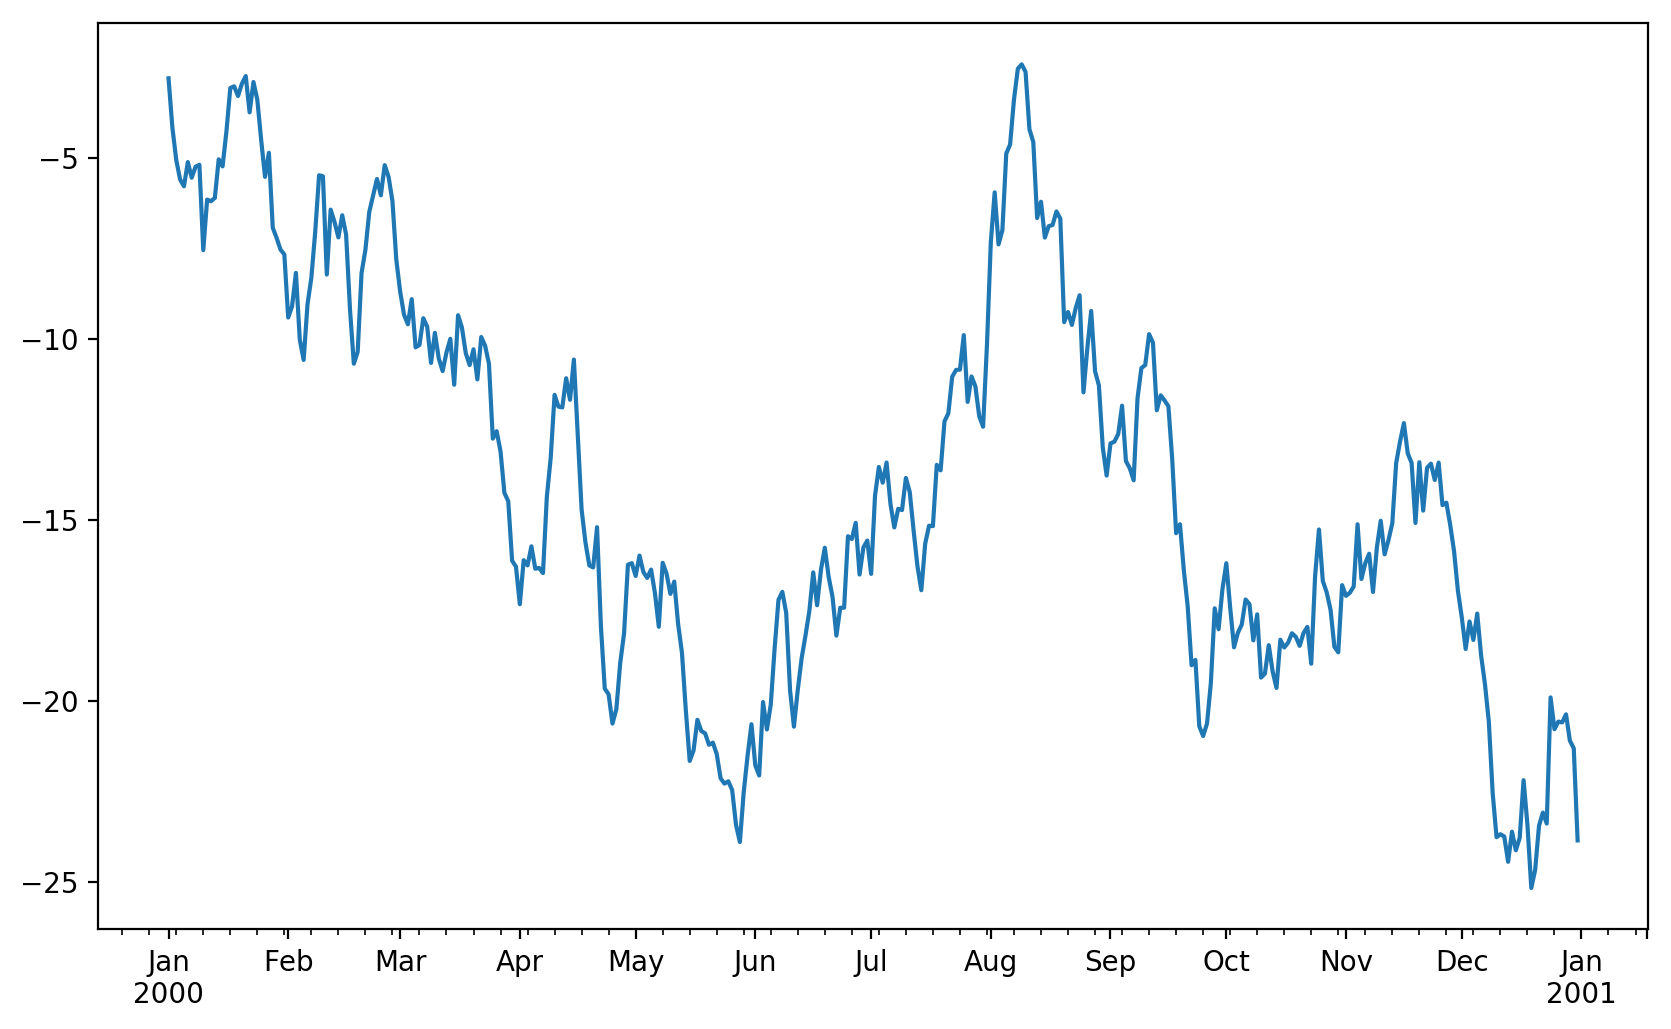

In [52]:
plt.figure(figsize=(10, 6), dpi=100)
cs = ts.cumsum()
cs.plot()

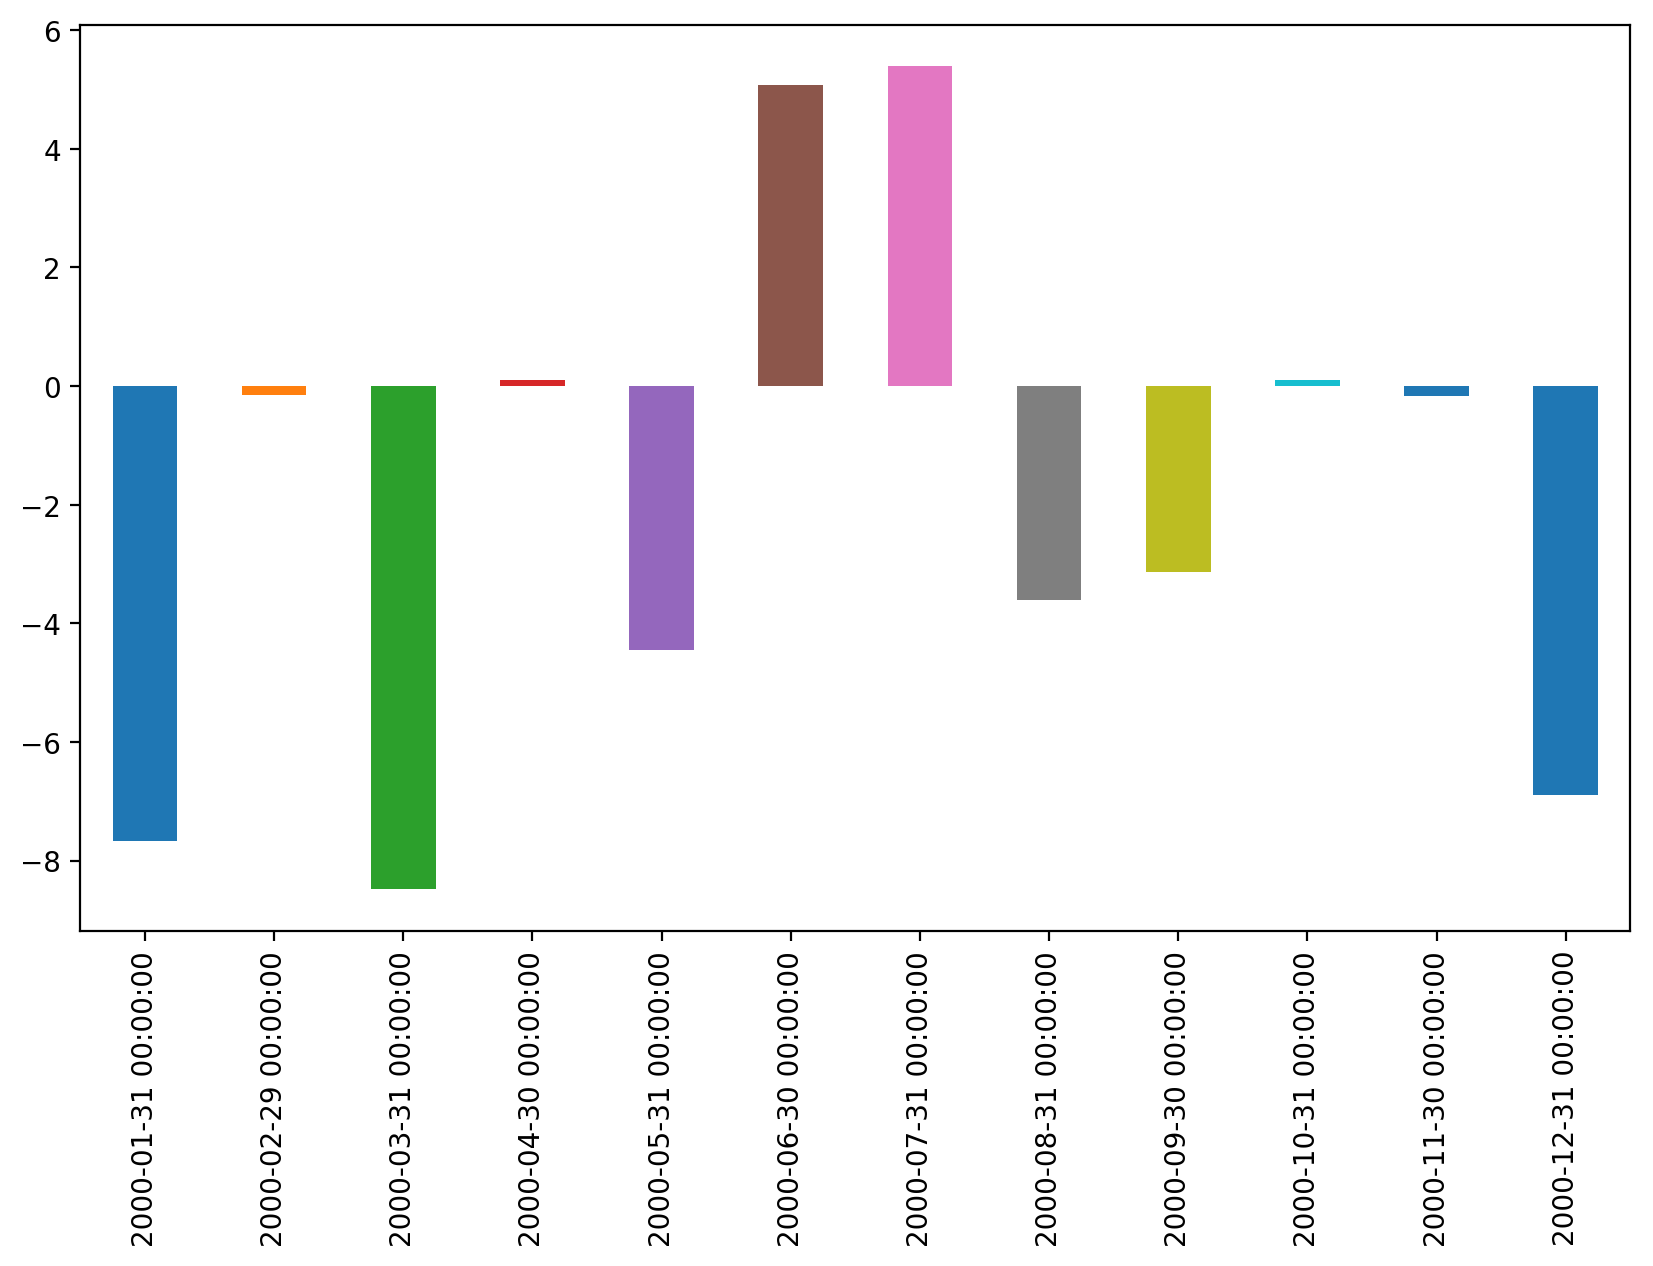

In [54]:
plt.figure(figsize=(10, 6), dpi=100)
ts.resample("1m").sum().plot.bar()
plt.show()

## 文件读写

In [55]:
df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))
df.to_csv('data.csv')

In [59]:
# 可以看到，索引也被输出了
!head data.csv

,A,B,C,D
0,-0.11623330521244596,0.2986608980986241,0.159419646259822,1.4813001445235647
1,-0.39352572203056674,0.9539831455584568,-2.1196425465555238,1.4429895666111032
2,0.05517109020752446,1.655804300404767,1.1429467994068336,0.04568713110147198
3,-0.12369482008538515,-0.7170471251490386,0.5202770646160415,-0.06626349370628713
4,-0.7490804397042707,1.0392555113153588,-0.5451625848645656,-1.2872560068481544
5,0.029145754543070553,0.25250899851810216,-1.0281524289919197,0.9749274614552942
6,-0.9493098108781156,-1.0980644719825041,0.27571982094104275,0.8283224342601891
7,0.38134946387880975,0.0934700321925778,-0.40755019462722264,0.8722026886729326
8,1.8335869620551133,-1.4500445990911914,-0.6178990658171977,-0.4012682505496615


<b><font size='3' color='ff0000'>上面，索引被输出成单独的一列，所以，读进来的时候，要设置哪一列是索引列。</font></b>

In [60]:
df = pd.read_csv('data.csv', index_col=0)
print(df.shape)
df.head(5)

(100, 4)


,A,B,C,D
0,-0.116233,0.298661,0.159420,1.481300
1,-0.393526,0.953983,-2.119643,1.442990
2,0.055171,1.655804,1.142947,0.045687
3,-0.123695,-0.717047,0.520277,-0.066263
4,-0.749080,1.039256,-0.545163,-1.287256


下面是 liwei 总结：

其实 Pandas 读写和对数据的操作都比较死板，用多了，就熟悉了。要多查询，多用，用多了就觉得很简单了。